In [1]:
import pandas as pd
import numpy as np

# 2.2 Data Preparation

### Load the data

In [2]:
data = pd.read_csv('data.csv')
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
data.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

### Rename and Standardize column naming

In [5]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
data.columns = data.columns.str.lower().str.replace(' ','_')
data.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [7]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Normalize values for all object columns

In [8]:
data.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
# Select column names with string valeus or tyoe object
str_cols = data.dtypes[data.dtypes == 'object'].index.tolist()
str_cols

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [10]:
# Clean string values, convert to lower case, remove spaces and trim extra whitespaces
for col in str_cols:
    data[col] = data[col].str.lower().str.replace(' ', '_').str.strip()

In [11]:
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# 2.3 Exploratory Data Analysis (EDA)

In [12]:
# Check for unique values per columns
for col in data.columns:
    print(col)
    print(data[col].unique()[:5])
    print(data[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [13]:
# Visualize
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

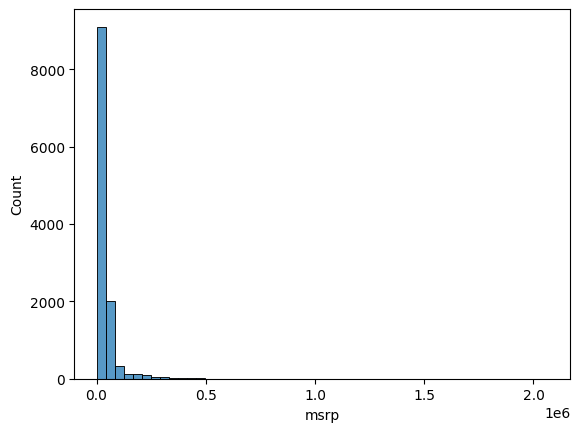

In [14]:
sns.histplot(data.msrp, bins=50)

C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

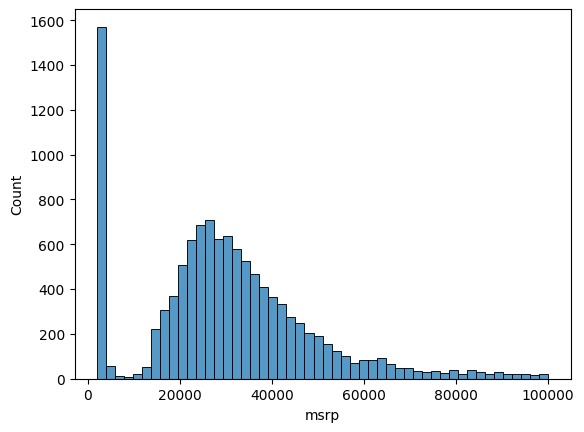

In [15]:
sns.histplot(data.msrp[data.msrp < 100000], bins=50)

In [16]:
# Apply log function to prices to get rid of the long tail distribution
prices_log = np.log1p(data.msrp) # log1p is a log function that adds 1 to all values to ensure that error of log(0) is avoided

C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='msrp', ylabel='Count'>

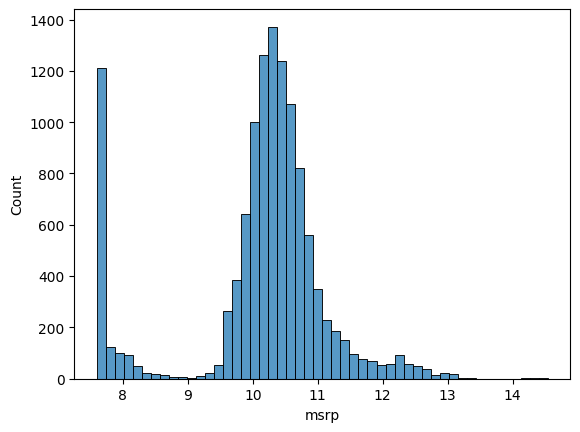

In [17]:
sns.histplot(prices_log, bins=50)

### Missing Values

In [18]:
data.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# Setting up the validation framework

In [19]:
# Split the data 60% for training, 20% for both validation and testing

n = len(data)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n_val, n_test, n_train

(2382, 2382, 7150)

### Shuffle data

In [20]:
idx = np.arange(n)

np.random.seed(2)
np.random.shuffle(idx)

In [21]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

In [22]:
df_shuffled = data.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy().reset_index(drop=True)
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy().reset_index(drop=True)
df_test = df_shuffled.iloc[n_train + n_val:].copy().reset_index(drop=True)

In [23]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [24]:
df_val.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,chevrolet,colorado,2015,regular_unleaded,200.0,4.0,automatic,four_wheel_drive,4.0,NaN,compact,extended_cab_pickup,25,19,1385,26885
1,mercedes-benz,e-class,2017,premium_unleaded_(required),241.0,4.0,automatic,all_wheel_drive,4.0,luxury,midsize,sedan,29,22,617,54650
2,ford,focus,2017,flex-fuel_(unleaded/e85),160.0,4.0,manual,front_wheel_drive,4.0,flex_fuel,compact,sedan,36,26,5657,16775
3,acura,tlx,2016,premium_unleaded_(recommended),290.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,34,21,204,42600
4,volkswagen,beetle_convertible,2016,regular_unleaded,170.0,4.0,automatic,front_wheel_drive,2.0,NaN,compact,convertible,34,25,873,25995


In [25]:
df_test.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,gmc,vandura,1994,regular_unleaded,165.0,6.0,automatic,rear_wheel_drive,3.0,NaN,compact,cargo_van,20,15,549,2000
1,mercedes-benz,600-class,1993,regular_unleaded,389.0,12.0,automatic,rear_wheel_drive,2.0,luxury,large,coupe,15,11,617,3211
2,toyota,venza,2013,regular_unleaded,268.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",midsize,wagon,25,18,2031,31120
3,volvo,740,1992,regular_unleaded,114.0,4.0,automatic,rear_wheel_drive,4.0,luxury,midsize,sedan,26,18,870,2000
4,ford,crown_victoria,2010,flex-fuel_(unleaded/e85),224.0,8.0,automatic,rear_wheel_drive,4.0,flex_fuel,large,sedan,24,16,5657,29905


In [26]:
len(df_val), len(df_test), len(df_train)

(2382, 2382, 7150)

In [27]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [28]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

# 2.5 Linear Regression Simple Example

In [29]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [30]:
# Linear regression formula
"""
 y = w0 + w1x1 + w2x2 + w3x3 ...
 we can say that
 y = w0x0 + w1x1 + w2x2 + w3x3 ...
 where x0 = 1
"""

'\n y = w0 + w1x1 + w2x2 + w3x3 ...\n we can say that\n y = w0x0 + w1x1 + w2x2 + w3x3 ...\n where x0 = 1\n'

In [31]:
xi = [453, 11, 86] # taken from the features above (engine hp, cty mpq and popularity)
w0 = 7.17
w = [0.01, 0.04, 0.002]

In [32]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

In [33]:
linear_regression(xi)

12.312

# 2.6 Linear Regression Vector Form

In [34]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    
    for j in range(n):
        res = res + w[j] * xi[j]
    return res

In [35]:
def linear_regression2(xi, w):
    return w0 + dot(xi, w)

In [36]:
linear_regression2(xi, w)

12.312000000000001

In [37]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [38]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86]

X = [x1 ,x2, x3]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [39]:
def linear_regression3(X, w_new):
    return X.dot(w_new)

In [40]:
linear_regression3(X, w_new)

array([12.38 , 13.552, 12.312])

# 2.7 Training Linear Regression Model

In [41]:
# Linear Formula

"""
y = w0x0 + w1x1 + w2x2 + w3x3 ...
wX = y
then, multiply both sides with X transform to square the Xs
XTX * w =  XT * y
then we can now multiply both side with the inverse of X transform to calculate for w
(XTX)^-1 * XTX * w = (XTX)^-1 * XT * y
since XTX)^-1 * XTX  si equal to Identity Matrix
then
w = (XTX)^-1 * XT * y
"""

'\ny = w0x0 + w1x1 + w2x2 + w3x3 ...\nwX = y\nthen, multiply both sides with X transform to square the Xs\nXTX * w =  XT * y\nthen we can now multiply both side with the inverse of X transform to calculate for w\n(XTX)^-1 * XTX * w = (XTX)^-1 * XT * y\nsince XTX)^-1 * XTX  si equal to Identity Matrix\nthen\nw = (XTX)^-1 * XT * y\n'

In [42]:
y = [10000, 20000, 15000, 25000, 10000, 20000, 15000, 25000, 12000]

In [43]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [44]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [45]:
# Add the ones as a column to X
# Skip this if using the function
#X = np.column_stack([ones, X])
#X

In [46]:
XTX = X.T.dot(X)
XTX 

array([[ 696471,   44115,  718540],
       [  44115,    7146,  118803],
       [ 718540,  118803, 6359986]])

In [47]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 2.35803616e-06, -1.46900642e-05,  8.00007928e-09],
       [-1.46900642e-05,  2.94487947e-04, -3.84130606e-06],
       [ 8.00007928e-09, -3.84130606e-06,  2.28083884e-07]])

In [48]:
# Check if (XTX)^-1 * XTX produces identity matrix
XTX_inv.dot(XTX).round(1)

array([[ 1.,  0.,  0.],
       [-0.,  1.,  0.],
       [ 0.,  0.,  1.]])

In [49]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full

array([ 26.19056151, 306.10125216,   3.69690859])

In [50]:
w0 = w_full[0]
w = w_full[1:]

w0, w

(26.19056150598928, array([306.10125216,   3.69690859]))

In [51]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) # represents the X0 inthe formula y = w0x0 + w1x1 + w2x2 + w3x3 ... where w0 is 1
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    
    return w0, w


In [52]:
train_linear_regression(X, y)

(30006.77669255554, array([ -22.77425287, -257.69412959,   -2.3012064 ]))

# 2.8 Car Price Baseline Model

In [93]:
# Limit features to Numeric columns
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [95]:
col_base1 = df_train.dtypes[df_train.dtypes == 'float64'].index.tolist()
col_base2 = df_train.dtypes[df_train.dtypes == 'int64'].index.tolist()

col_base = col_base1 + col_base2
col_base.remove('year')
col_base.remove('number_of_doors')
col_base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [96]:
base = df_train[col_base]
base

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,148.0,4.0,33,24,1385
1,132.0,4.0,32,25,2031
2,148.0,4.0,37,28,640
3,90.0,4.0,18,16,873
4,385.0,8.0,21,15,5657
...,...,...,...,...,...
7145,300.0,6.0,31,20,3916
7146,210.0,4.0,30,24,873
7147,285.0,6.0,22,17,549
7148,563.0,12.0,21,13,86


In [97]:
base.isnull().sum()

engine_hp           40
engine_cylinders    14
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [98]:
# Deal with null values, for now we can fill them with 0 as an example only
base.fillna(0, inplace=True)
base.isnull().sum()

C:\Users\Herald\AppData\Local\Temp\ipykernel_28228\3903260285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.fillna(0, inplace=True)


engine_hp           0
engine_cylinders    0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [99]:
# Extract array values for X_train 
X_train = base.values
X_train

array([[ 148.,    4.,   33.,   24., 1385.],
       [ 132.,    4.,   32.,   25., 2031.],
       [ 148.,    4.,   37.,   28.,  640.],
       ...,
       [ 285.,    6.,   22.,   17.,  549.],
       [ 563.,   12.,   21.,   13.,   86.],
       [ 200.,    4.,   31.,   22.,  873.]])

In [100]:
# Train dataset with the function we made earlier
w0, w = train_linear_regression(X_train, y_train)

In [101]:
# Getting our predictions, use the formula y = w0x0 + w1x1 + w2x2 + w3x3 ...

y_train_pred = w0 + X_train.dot(w)
y_train_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: ylabel='Count'>

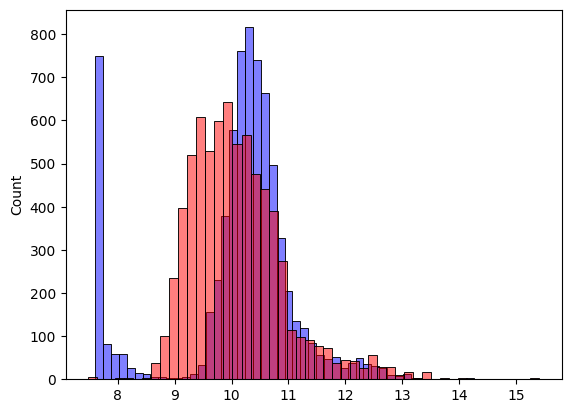

In [102]:
# Comparing our orediction to the actual values
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)
sns.histplot(y_train_pred, color='red', alpha=0.5, bins=50)

# 2.9 RSME (Root Mean Squared Error)

In [103]:
# RSME is a value that can be used to say in a quantifiable if our model is good or bad
"""
RMSE = sqrt [(Σ(Pi – Oi)²) / n]

where Pi: predicted values
Oi : actual observed value
n : number of observations
"""

'\nRMSE = sqrt [(Σ(Pi – Oi)²) / n]\n\nwhere Pi: predicted values\nOi : actual observed value\nn : number of observations\n'

In [104]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [105]:
rmse(y_train, y_train_pred)

0.7554192603920132

# 2.10 Validating the Model

In [106]:
# Create a fucntion to prepare X values

def prepare_X(X_df):
    prep_df = X_df[col_base]
    prep_df = prep_df.fillna(0)
    X = prep_df.values
    return X

In [107]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Validating
X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

#RSME
rmse(y_val, y_val_pred)

0.761653099130156

C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: ylabel='Count'>

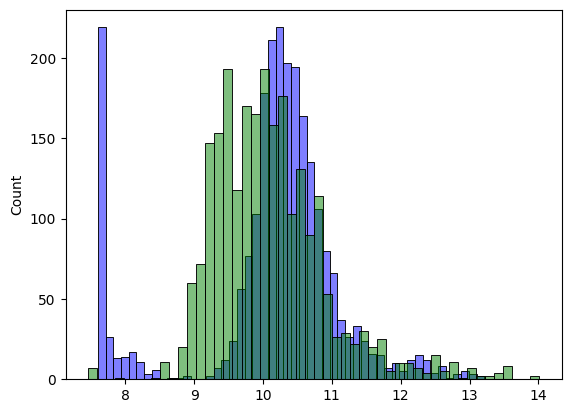

In [108]:
# Comparing our orediction to the actual values
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
sns.histplot(y_val_pred, color='green', alpha=0.5, bins=50)

# 2.11 Feature Engineering

In [109]:
# Feature Engineering is done to improve performace of our model

In [110]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86


In [111]:
# Check when was the latest year available in our data so that we can compute the age of the cars
df_train.year.max()

2017

In [112]:
# So the computation for age will be like 2017 - df_train.year()
# We include this calculation in our X data preparation

def prepare_X(X_df):
    X_df = X_df.copy()
    X_df['age'] = 2017 - X_df.year
    features = col_base + ['age'] 
    
    prep_df = X_df[features]
    prep_df = prep_df.fillna(0)
    X = prep_df.values
    return X

In [113]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Validating
X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

#RSME
rmse(y_val, y_val_pred)

0.5172055461058299

C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Herald\anaconda3\envs\ml_zoom\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: ylabel='Count'>

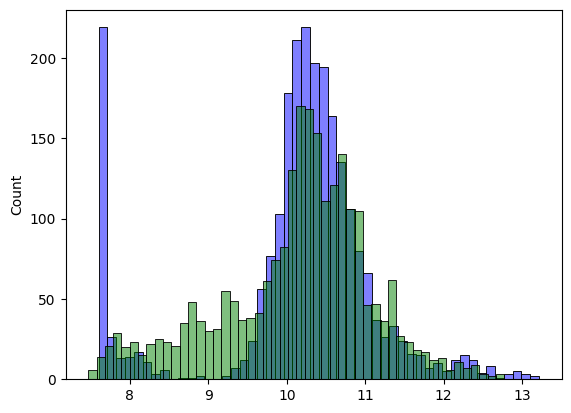

In [114]:
# Comparing our orediction to the actual values
sns.histplot(y_val, color='blue', alpha=0.5, bins=50)
sns.histplot(y_val_pred, color='green', alpha=0.5, bins=50)

# 2.12 Categorical Variables

In [148]:
# There are times that a columns looks a numeric value but should be a categorical value such as below
df_train.number_of_doors

0       2.0
1       4.0
2       4.0
3       3.0
4       4.0
       ... 
7145    2.0
7146    2.0
7147    4.0
7148    4.0
7149    4.0
Name: number_of_doors, Length: 7150, dtype: float64

In [149]:
df_train.number_of_doors.unique()

array([ 2.,  4.,  3., nan])

In [150]:
# Convert each value to a column with values as boolean int 

for v in [2, 3, 4]:
    df_train['number_of_doors_%s' % v] = (df_train.number_of_doors == v).astype(int)

In [151]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,number_of_doors_2,number_of_doors_3,number_of_doors_4
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,1,0,0
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,0,0,1
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,0,0,1
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,0,1,0
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7145,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,1,0,0
7146,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,1,0,0
7147,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,0,0,1
7148,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,0,0,1


In [152]:
# Include this process in our prep function

def prepare_X(X_df):
    X_df = X_df.copy()
    X_df['age'] = 2017 - X_df.year
    features = col_base + ['age'] 
    
    for v in [2, 3, 4]:
        X_df['number_of_doors_%s' % v] = (X_df.number_of_doors == v).astype(int)
        features.append('number_of_doors_%s' % v)
    
    prep_df = X_df[features]
    prep_df = prep_df.fillna(0)
    X = prep_df.values
    return X

In [153]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Validating
X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

#RSME
rmse(y_val, y_val_pred)

0.5157995641501689

In [154]:
# We can observe very minimal improvement to our model, so lets add another categorical data to our process
df_train.make.nunique()

48

In [155]:
makes = data.make.value_counts().head().index.tolist()
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

In [158]:
def prepare_X(X_df):
    X_df = X_df.copy()
    X_df['age'] = 2017 - X_df.year
    features = col_base + ['age'] 
    
    for v in [2, 3, 4]:
        X_df['number_of_doors_%s' % v] = (X_df.number_of_doors == v).astype(int)
        features.append('number_of_doors_%s' % v)
        
    for v in makes:
        X_df['make_%s' % v] = (X_df.make == v).astype(int)
        features.append('make_%s' % v)
    
    prep_df = X_df[features]
    prep_df = prep_df.fillna(0)
    X = prep_df.values
    return X

In [159]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Validating
X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

#RSME
rmse(y_val, y_val_pred)

0.5076038849556757

In [160]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
number_of_doors_2      int32
number_of_doors_3      int32
number_of_doors_4      int32
dtype: object

In [161]:
# Add more categorical data to our function

categorical_cols = ['make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
             'market_category', 'vehicle_style']

In [162]:
categories = {}

for c in categorical_cols:
    categories[c] = data[c].value_counts().head().index.tolist()

In [163]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [168]:
# Modify the prep function once more

def prepare_X(X_df):
    X_df = X_df.copy()
    X_df['age'] = 2017 - X_df.year
    features = col_base + ['age'] 
    
    for v in [2, 3, 4]:
        X_df['number_of_doors_%s' % v] = (X_df.number_of_doors == v).astype(int)
        features.append('number_of_doors_%s' % v)
        
    for c, values in categories.items():
        for v in values:
            X_df['%s_%s' % (c,v)] = (X_df[c] == v).astype(int)
            features.append('%s_%s' % (c,v))
    
    prep_df = X_df[features]
    prep_df = prep_df.fillna(0)
    X = prep_df.values
    return X

In [169]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#Validating
X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

#RSME
rmse(y_val, y_val_pred)

45.61918319897014

In [171]:
int(w0)

-12570145207456140

In [172]:
w

array([-3.14539635e-02,  2.30703384e+01,  1.37912691e+00,  8.20630191e+00,
       -6.11085395e-04,  2.41589906e+00,  2.01689274e+02,  2.13868811e+02,
        2.05556673e+02,  6.25010690e+00,  1.47236024e+01, -8.97314299e-02,
       -1.04849495e+01,  1.65186906e+01, -1.97269098e+02, -1.85091465e+02,
       -1.87815424e+02, -1.79757007e+02, -2.27932123e+02,  1.25701452e+16,
        1.25701452e+16,  1.25701452e+16,  1.25701452e+16,  1.25701452e+16,
        8.42119330e-01,  9.50137355e+00,  1.25922515e+01,  1.75953961e+01,
       -7.12351174e-02,  1.98842308e-02, -6.85548907e-02, -5.63204254e-02,
        3.45975010e-02, -8.76212384e-02,  2.45339487e-02,  1.96163663e-01,
        3.78837085e-01, -1.63461013e-01])

In [173]:
# We wanted to improve our model by adding more variable but it just made it worse, next topic we wil llearn why it happened and what we can do to avoid this

# Regularization

In [ ]:
"""
Revisiting our normal formula, we have: 
w = (XTX)^-1 * XT * y

The problem that we had is that sometimes (XTX)^-1 does not exist, and is caused by duplicate features
"""

In [174]:
# Example of the issue

X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5]
]

# Observe that 2nd and 3rd columns has the same values

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [176]:
XTX = X.T.dot(X)
XTX

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

In [177]:
# Getting the inverse, will cause an error
np.linalg.inv(XTX)

LinAlgError: Singular matrix

In [178]:
# To solve this ,we add a small number to our diagonal, it make sure that there is no duplicates between our features

XTX = XTX + 0.01 * np.eye(3)
XTX

array([[140.01, 111.  , 111.  ],
       [111.  , 108.01, 108.  ],
       [111.  , 108.  , 108.01]])

In [180]:
# Thaing the inverse will have no error
np.linalg.inv(XTX)

array([[ 3.85624712e-02, -1.98159081e-02, -1.98159081e-02],
       [-1.98159081e-02,  5.00124974e+01, -4.99875026e+01],
       [-1.98159081e-02, -4.99875026e+01,  5.00124974e+01]])

In [183]:
# incorporate this in the training function
def train_linear_regression_reg(X, y, r= 0.001):
    ones = np.ones(X.shape[0]) # represents the X0 inthe formula y = w0x0 + w1x1 + w2x2 + w3x3 ... where w0 is 1
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]
    
    return w0, w

In [184]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

#Validating
X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

#RSME
rmse(y_val, y_val_pred)

0.45801482584620523

# 2.14 Tuning the Model

In [185]:
# Tuning the model is finding the best value for r to regularize our model

In [186]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    #Validating
    X_val = prepare_X(df_val)
    y_val_pred = w0 + X_val.dot(w)

    #RSME
    score = rmse(y_val, y_val_pred)
    
    print(r, w0, score)


0.0 -1.257014520745614e+16 45.61918319897014
1e-05 9.252224427668462 0.4580077582151462
0.0001 7.739801268548791 0.4580078174858846
0.001 7.7363686893059835 0.4580084516803947
0.1 7.601509446130088 0.45808141226775473
1 6.8210085846282364 0.4589480514393094
10 5.011404435174462 0.474616464882859


In [187]:
# Select the best score 
r = 0.00001

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

#Validating
X_val = prepare_X(df_val)
y_val_pred = w0 + X_val.dot(w)

#RSME
score = rmse(y_val, y_val_pred)
score

0.4580077582151462

# 2.15 Using the Model

In [188]:
# Now we train our model with both df train and val
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

In [189]:
X_full_train = prepare_X(df_full_train)
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [190]:
# Also, combine our y_train and y_val
y_full_train = np.concatenate([y_train, y_val])

In [191]:
# Train the model with the new set of training data
r = 0.00001
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=r)

In [192]:
w0

9.803479098978066

In [193]:
w

array([ 1.43456307e-03,  1.10697086e-01, -7.05732380e-03, -3.99073984e-03,
       -5.00890858e-05, -9.70847805e-02, -7.57592850e-01, -8.63977292e-01,
       -5.93911360e-01, -4.99408917e-02,  1.61595231e-01, -8.96233555e-03,
       -1.10338856e-01, -1.04985888e-01, -4.68333737e-01,  9.04385218e-02,
       -3.16184638e-01, -5.53063228e-01, -9.93171644e-02, -6.14731918e-01,
       -7.56782947e-01, -5.20620813e-01,  8.16635087e-01, -1.21024679e+00,
        1.99258902e+00,  1.89978957e+00,  1.98041024e+00,  1.91583999e+00,
       -8.45293255e-02,  1.23061328e-02, -8.02594571e-02, -4.49338353e-02,
        1.38307903e-02, -8.67946866e-02,  2.44329135e-02,  1.98840400e-01,
        3.65654004e-01, -1.57196850e-01])

In [194]:
#Apply model to our test dataset
X_test = prepare_X(df_test)
y_test_pred = w0 + X_test.dot(w)

#RSME
score = rmse(y_test, y_test_pred)
score

0.45455426605091864

In [ ]:
# We can observe that the rmse of our testt data is not far with the training and validation the we did

In [ ]:
# Use the model

In [195]:
# Let's say that this is an unseen data of our model, that was entered by a user to an application that collects data and predicts the car price
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [197]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [198]:
X_small = prepare_X(df_small)

In [201]:
y__pred = w0 + X_small.dot(w)
y__pred = y__pred[0]
y__pred

10.510361637001076

In [202]:
# Since y_pred is a logarithmic value, we take its exponential to get the acualt predicted price
np.expm1(y__pred)

36692.74696133856

In [203]:
# Comparing to the actual value
y_test[20]

10.463131911491967

In [204]:
np.expm1(y_test[20])

35000.00000000001

In [205]:
# The actual price was $35000 and our model predicted $36692.74